THIS NOTEBOOK WILL BE USED FOR THE COURSE SUPERVISED LEARNING FIRST, I WILL COPY AND PASTE THE CODE HERE 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd


In [4]:
#load_dataset
churn_df=pd.read_csv('telecom_churn_clean.csv')



Got It!
1. The classification challenge
Previously, we learned that supervised learning uses labels. Let's discuss how we can build a classification model, or classifier, to predict the labels of unseen data.

2. Classifying labels of unseen data
There are four steps. First, we build a classifier, which learns from the labeled data we pass to it. We then pass it unlabeled data as input, and have it predict labels for this unseen data. As the classifier learns from the labeled data, we call this the training data.

3. k-Nearest Neighbors
Let's build our first model! We'll use an algorithm called k-Nearest Neighbors, which is popular for classification problems. The idea of k-Nearest Neighbors, or KNN, is to predict the label of any data point by looking at the k, for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should have. KNN uses majority voting, which makes predictions based on what label the majority of nearest neighbors have.

4. k-Nearest Neighbors
Using this scatter plot as an example, how do we classify the black observation?

5. k-Nearest Neighbors
If k equals three, we would classify it as red. This is because two of the three closest observations are red.

6. k-Nearest Neighbors
If k equals five, we would instead classify it as blue.

7. KNN Intuition
To build intuition for KNN, let's look at this scatter plot displaying total evening charge against total day charge for customers of a telecom company. The observations are colored in blue for customers who have churned, and red for those who have not churned.

8. KNN Intuition
Here we have visualized the results of a KNN algorithm where the number of neighbors is set to 15. KNN creates a decision boundary to predict if customers will churn. Any customers in the area with a gray background are predicted to churn, and those in the area with a red background are predicted to not churn. This boundary would be used to make predictions on unseen data.

9. Using scikit-learn to fit a classifier
To fit a KNN model using scikit-learn, we import KNeighborsClassifier from sklearn-dot-neighbors. We split our data into X, a 2D array of our features, and y, a 1D array of the target values - in this case, churn status. scikit-learn requires that the features are in an array where each column is a feature and each row a different observation. Similarly, the target needs to be a single column with the same number of observations as the feature data. We use the dot-values attribute to convert X and y to NumPy arrays. Printing the shape of X and y, we see there are 3333 observations of two features, and 3333 observations of the target variable. We then instantiate our KNeighborsClassifier, setting n_neighbors equal to 15, and assign it to the variable knn. Then we can fit this classifier to our labeled data by applying the classifier's dot-fit method and passing two arguments: the feature values, X, and the target values, y.

10. Predicting on unlabeled data
Here we have a set of new observations, X_new. Checking the shape of X_new, we see it has three rows and two columns, that is, three observations and two features. We use the classifier's dot-predict method and pass it the unseen data as a 2D NumPy array containing features in columns and observations in rows. Printing the predictions returns a binary value for each observation or row in X_new. It predicts 1, which corresponds to 'churn', for the first observation, and 0, which corresponds to 'no churn', for the second and third observations.

11. Let's practice!
Now let's build our own KNN model for the churn dataset, which we will use for the remainder of the chapter!

In [5]:
# Import KNeighborsClassifier
from sklearn.neighbors import  KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]



Got It!
1. Measuring model performance
Now we can make predictions using a classifier, but how do we know if the model is making correct predictions? We can evaluate its performance!

2. Measuring model performance
In classification, accuracy is a commonly-used metric. Accuracy is the number of correct predictions divided by the total number of observations.

3. Measuring model performance
How do we measure accuracy? We could compute accuracy on the data used to fit the classifier. However, as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data, which is what we are interested in!

4. Computing accuracy
It is common to split data into a training set and a test set.

5. Computing accuracy
We fit the classifier using the training set,

6. Computing accuracy
then we calculate the model's accuracy against the test set's labels.

7. Train/test split
To do this, we import train_test_split from sklearn-dot-model_selection. We call train_test_split, passing our features and targets. We commonly use 20-30% of our data as the test set. By setting the test_size argument to zero-point-three we use 30% here. The random_state argument sets a seed for a random number generator that splits the data. Using the same number when repeating this step allows us to reproduce the exact split and our downstream results. It is best practice to ensure our split reflects the proportion of labels in our data. So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting stratify equal to y. train_test_split returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into X_train, X_test, y_train, and y_test, respectively. We then instantiate a KNN model and fit it to the training data using the dot-fit method. To check the accuracy, we use the dot-score method, passing X test and y test. The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

8. Model complexity
Let's discuss how to interpret k. Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation. In the image shown, as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model. Simpler models are less able to detect relationships in the dataset, which is known as underfitting. In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.

9. Model complexity and over/underfitting
We can also interpret k using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results. We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values. We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data. We then calculate training and test set accuracy, storing the results in their respective dictionaries.

10. Plotting our results
After our for loop, we then plot the training and test values, including a legend and labels.

11. Model complexity curve
Here's the result! As k increases beyond 15 we see overfitting where performance plateaus on both test and training sets, as indicated in this plot.

12. Model complexity curve
The peak test accuracy actually occurs at around 13 neighbors.

13. Let's practice!
Now let's practice splitting data, computing accuracy, and plotting model complexity curves!

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( X,y,test_size=.3,random_state=21,stratify=y )
knn_2=KNeighborsClassifier(n_neighbors=6)
knn_2.fit(x_train,y_train)
print(knn_2.score(x_test,y_test))

0.852


[[1, 0.858], [2, 0.859], [3, 0.859], [4, 0.853], [5, 0.86], [6, 0.855], [7, 0.852], [8, 0.86], [9, 0.859], [10, 0.855], [11, 0.859], [12, 0.863], [13, 0.859], [14, 0.858], [15, 0.858], [16, 0.858], [17, 0.86], [18, 0.86], [19, 0.864], [20, 0.857], [21, 0.858], [22, 0.854], [23, 0.859], [24, 0.857], [25, 0.856], [26, 0.859], [27, 0.856], [28, 0.86], [29, 0.859], [30, 0.855], [31, 0.855], [32, 0.855], [33, 0.856], [34, 0.861], [35, 0.86], [36, 0.859], [37, 0.856], [38, 0.858], [39, 0.86]]


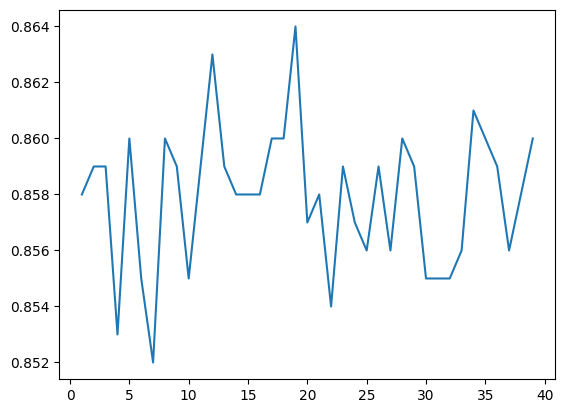

In [7]:
#CODE WRITTEN BY ME
a=[]
for i in range(1,40):
    x_train,x_test,y_train,y_test=train_test_split( X,y,test_size=.3,random_state=i*4,stratify=y )
    knn_3=KNeighborsClassifier(n_neighbors=i)
    knn_3.fit(x_train,y_train)
    a.append([i,knn_2.score(x_test,y_test)])
    
print(a)
a=np.array(a)
x=[]
Z=[]
for i in range(39):
    x.append(a[i][0])
    Z.append(a[i][1])
x=np.array(x)
Z=np.array(Z)    
plt.plot(x,Z)
# Display the plot
plt.show()


In [8]:
X_train,X_test,y_train,y_test=train_test_split( X,y,test_size=.3,random_state=21,stratify=y )

# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8568366909558508, 2: 0.8748392627518217, 3: 0.8701243034719246, 4: 0.8705529361337334, 5: 0.8718388341191599, 6: 0.8602657522503214, 7: 0.866695242177454, 8: 0.8585512216030862, 9: 0.8585512216030862, 10: 0.8585512216030862, 11: 0.858979854264895, 12: 0.8555507929704244} 
 {1: 0.774, 2: 0.838, 3: 0.83, 4: 0.851, 5: 0.847, 6: 0.852, 7: 0.851, 8: 0.851, 9: 0.85, 10: 0.854, 11: 0.855, 12: 0.855}


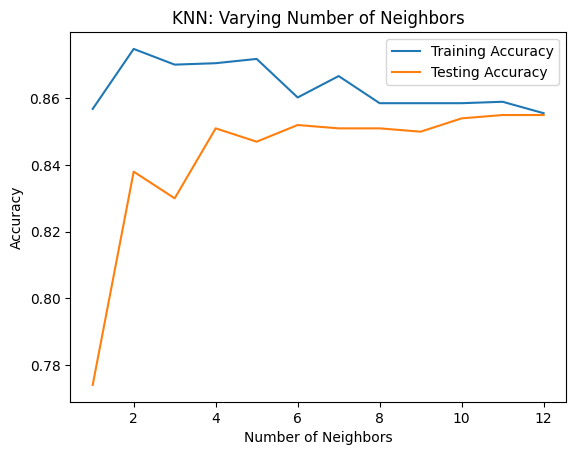

In [9]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

CHAPTER ONE FINISHES HERE

CHAPTER  TWO STARTS HERE 

In [10]:
#load data
sales_df=pd.read_csv("Advertising Budget and Sales.csv")
#im using a different dataset .

In [11]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y =sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape,y.shape)

(200, 1) (200,)


In [1]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

NameError: name 'X' is not defined

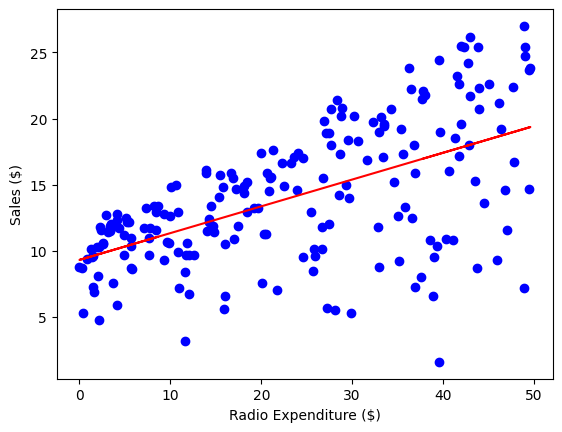

In [13]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X,predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()


Got It!
1. The basics of linear regression
So, how does linear regression work?

2. Regression mechanics
We want to fit a line to the data, and in two dimensions this takes the form of y equals ax plus b. Using a single feature is known as simple linear regression, where y is the target, x is the feature, and a and b are the model parameters that we want to learn. a and b are also called the model coefficients, or the slope and intercept, respectively. So how do we accurately choose values for a and b? We can define an error function for any given line and then choose the line that minimizes this function. Error functions are also called loss or cost functions.

3. The loss function
Let's visualize a loss function using this scatter plot. We want the line to be as close to the

4. The loss function
observations as possible. Therefore, we want to minimize the vertical distance between the fit and the data. So for each observation,

5. The loss function
we calculate the vertical distance between it and the line.

6. The loss function
This distance is called a residual. We could try to minimize the sum of the residuals,

7. The loss function
but then each positive residual would cancel out

8. Ordinary Least Squares
each negative residual. To avoid this, we square the residuals. By adding all the squared residuals, we calculate the residual sum of squares, or RSS. This type of linear regression is called Ordinary Least Squares, or OLS, where we aim to minimize the RSS.

9. Linear regression in higher dimensions
When we have two features, x1 and x2, and one target, y, a line takes the form y = a1x1 + a2x2 + b. So to fit a linear regression model we specify three variables, a1, a2, and the intercept, b. When adding more features, it is known as multiple linear regression. Fitting a multiple linear regression model means specifying a coefficient, a n, for n number of features, and b. For multiple linear regression models, scikit-learn expects one variable each for feature and target values.

10. Linear regression using all features
Let's perform linear regression to predict blood glucose levels using all of the features from the diabetes dataset. We import LinearRegression from sklearn-dot-linear_model. Then we split the data into training and test sets, instantiate the model, fit it on the training set, and predict on the test set. Note that linear regression in scikit-learn performs OLS under the hood.

11. R-squared
The default metric for linear regression is R-squared, which quantifies the amount of variance in the target variable that is explained by the features. Values can range from zero to one, with one meaning the features completely explain the target's variance. Here are two plots visualizing high and low R-squared respectively.

12. R-squared in scikit-learn
To compute R-squared, we call the model's dot-score method, passing the test features and targets. Here the features only explain about 35 percent of blood glucose level variance.

13. Mean squared error and root mean squared error
Another way to assess a regression model's performance is to take the mean of the residual sum of squares. This is known as the mean squared error, or MSE. MSE is measured in units of our target variable, squared. For example, if a model is predicting a dollar value, MSE will be in dollars squared. To convert to dollars, we can take the square root, known as the root mean squared error, or RMSE.

14. RMSE in scikit-learn
To calculate RMSE, we import mean_squared_error from sklearn-dot-metrics, then call mean_squared_error. We pass y_test and y_pred, and set squared equal to False, which returns the square root of the MSE. The model has an average error for blood glucose levels of around 24 milligrams per deciliter.

15. Let's practice!
Now let's build and evaluate a multiple linear regression model!

In [10]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)
# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

NameError: name 'sales_df' is not defined

In [15]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.8609155416329137
RMSE: 1.948755156751894



Got It!
1. Cross-validation
Great work on those regression challenges! Hopefully we are now feeling familiar with train test split and computing model performance metrics on our test set. But, there is a potential pitfall of this process.

2. Cross-validation motivation
If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

3. Cross-validation basics
We begin by splitting the dataset into five groups or folds.

4. Cross-validation basics
Then we set aside the first fold as a test set,

5. Cross-validation basics
fit our model on the remaining four folds, predict on our test set,

6. Cross-validation basics
and compute the metric of interest, such as R-squared.

7. Cross-validation basics
Next, we set aside the second fold as our test set,

8. Cross-validation basics
fit on the remaining data, predict on the test set,

9. Cross-validation basics
and compute the metric of interest.

10. Cross-validation basics
Then similarly with the third fold,

11. Cross-validation basics
the fourth fold,

12. Cross-validation basics
and the fifth fold. As a result we get five values of R-squared from which we can compute statistics of interest, such as the mean, median, and 95% confidence intervals.

13. Cross-validation and model performance
As we split the dataset into five folds, we call this process 5-fold cross-validation. If we use 10 folds, it is called 10-fold cross-validation. More generally, if we use k folds, it is called k-fold cross-validation or k-fold CV. There is, however, a trade-off. Using more folds is more computationally expensive. This is because we are fitting and predicting more times.

14. Cross-validation in scikit-learn
To perform k-fold cross-validation in scikit-learn, we import cross_val_score from sklearn-dot-model_selection. We also import KFold, which allows us to set a seed and shuffle our data, making our results repeatable downstream. We first call KFold. The n_splits argument has a default of five, but in this case we assign six, allowing us to use six folds from our dataset for cross-validation. We also set shuffle to True, which shuffles our dataset before splitting into folds. We also assign a seed to the random_state keyword argument, ensuring our data would be split in the same way if we repeat the process making the results repeatable downstream. We save this as the variable kf. As usual, we instantiate our model, in this case, linear regression. We then call cross_val_score, passing the model, the feature data, and the target data as the first three positional arguments. We also specify the number of folds by setting the keyword argument cv equal to our kf variable. This returns an array of cross-validation scores, which we assign to cv_results. The length of the array is the number of folds utilized. Note that the score reported is R squared, as this is the default score for linear regression.

15. Evaluating cross-validation peformance
We can now print the scores. This returns six results ranging from zero-point-seven to approximately zero-point-seven-seven. We can calculate the mean score using np-dot-mean, and the standard deviation using np-dot-std. Additionally, we can calculate the 95% confidence interval using the np-dot-quantile function, passing our results followed by a list containing the upper and lower limits of our interval as decimals.

16. Let's practice!
Now let's apply k-fold cross-validation on our sales dataset!

In [18]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_results)
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [.025, .975]))

[0.89488585 0.87851983 0.82806531 0.91920955 0.89588727 0.91264742]
0.8882025369451233
0.029924766194783847
[0.83437212 0.91838928]



Got It!
1. Regularized regression
Now let's explore regularization in regression, a technique used to avoid overfitting.

2. Why regularize?
Recall that fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization.

3. Ridge regression
The first type of regularized regression that we'll look at is called ridge. With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. When using ridge, we need to choose the alpha value in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge is similar to picking k in KNN. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters. Alpha controls model complexity. When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

4. Ridge regression in scikit-learn
To perform ridge regression in scikit-learn, we import Ridge from sklearn-dot-linear_model. To highlight the impact of different alpha values, we create an empty list for our scores, then loop through a list of different alpha values. Inside the for loop we instantiate Ridge, setting the alpha keyword argument equal to the iterator, also called alpha. We fit on the training data, and predict on the test data. We save the model's R-squared value to the scores list. Finally, outside of the loop, we print the scores for the models with five different alpha values. We see performance gets worse as alpha increases.

5. Lasso regression
There is another type of regularized regression called lasso, where our loss function is the OLS loss function plus the absolute value of each coefficient multiplied by some constant, alpha.

6. Lasso regression in scikit-learn
To use Lasso we import it from sklearn-dot-linear_model. The actual method for performing lasso regression in scikit-learn mirrors ridge regression, as we can see here. Performance drops substantially as alpha goes over 20!

7. Lasso regression for feature selection
Lasso regression can actually be used to assess feature importance. This is because it tends to shrink the coefficients of less important features to zero. The features whose coefficients are not shrunk to zero are selected by the lasso algorithm. Let's check this out in practice.

8. Lasso for feature selection in scikit-learn
We import Lasso. Next, we create our feature and target arrays, and use the dataset's dot-columns attribute to access the feature names and store as the variable names. As we are calculating feature importance we use the entire dataset, rather than splitting it. We then instantiate Lasso, setting alpha to zero-point-one. We fit the model to the data and extract the coefficients using the dot-coef-underscore attribute, storing as lasso_coef. We then plot the coefficients for each feature.

9. Lasso for feature selection in scikit-learn
We can see that the most important predictor for our target variable, blood glucose levels, is the binary value for whether an individual has diabetes or not! This is not surprising, but is a great sanity check. This type of feature selection is very important because it allows us to communicate results to non-technical audiences. It is also useful for identifying which factors are important predictors for various physical phenomena.

10. Let's practice!
Now let's apply regularization to our regression models!

In [ ]:
#NEW_VIDEO


# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.         0.04403347 0.19808631 0.00647079]


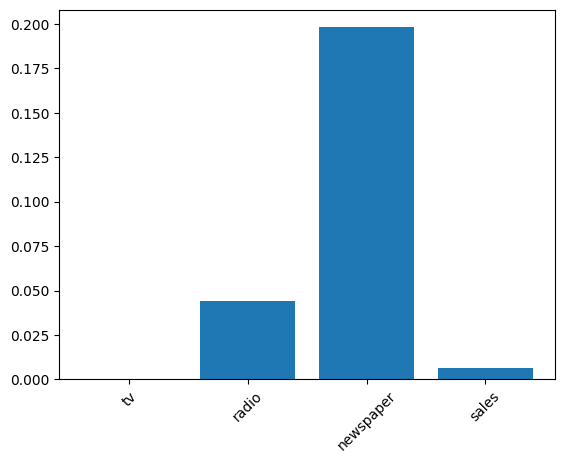

In [20]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
sales=['tv','radio','newspaper','sales']
plt.bar(sales, lasso_coef)
plt.xticks(rotation=45)
plt.show()
#print(sales)

CHAPTER TWO ENDS HERE 

CHAPTER THREE STARTS HERE


Got It!
1. How good is your model?
Thinking back to classification problems,

2. Classification metrics
recall that we can use accuracy, the fraction of correctly classified labels, to measure model performance. However, accuracy is not always a useful metric.

3. Class imbalance
Consider a model for predicting whether a bank transaction is fraudulent, where only 1% of transactions are actually fraudulent. We could build a model that classifies every transaction as legitimate; this model would have an accuracy of 99%! However, it does a terrible job of actually predicting fraud, so it fails at its original purpose. The situation where one class is more frequent is called class imbalance. Here, the class of legitimate transactions contains way more instances than the class of fraudulent transactions. This is a common situation in practice and requires a different approach to assessing the model's performance.

4. Confusion matrix for assessing classification performance
Given a binary classifier, such as our fraudulent transactions example, we can create a 2-by-2 matrix that summarizes performance called a confusion matrix.

5. Assessing classification performance
Across the top are the predicted labels,

6. Assessing classification performance
and down the side are the actual labels.

7. Assessing classification performance
Given any model, we can fill in the confusion matrix according to its predictions.

8. Assessing classification performance
The true positives are the number of fraudulent transactions correctly labeled;

9. Assessing classification performance
The true negatives are the number of legitimate transactions correctly labeled;

10. Assessing classification performance
The false negatives are the number of legitimate transactions incorrectly labeled;

11. Assessing classification performance
And the false positives are the number of transactions incorrectly labeled as fraudulent.

12. Assessing classification performance
Usually, the class of interest is called the positive class. As we aim to detect fraud, the positive class is an illegitimate transaction. So why is the confusion matrix important? Firstly, we can retrieve accuracy: it's the sum of true predictions divided by the total sum of the matrix.

13. Precision
Secondly, there are other important metrics we can calculate from the confusion matrix. Precision is the number of true positives divided by the sum of all positive predictions. It is also called the positive predictive value. In our case, this is the number of correctly labeled fraudulent transactions divided by the total number of transactions classified as fraudulent. High precision means having a lower false positive rate. For our classifier, this translates to fewer legitimate transactions being classified as fraudulent.

14. Recall
Recall is the number of true positives divided by the sum of true positives and false negatives. This is also called sensitivity. High recall reflects a lower false negative rate. For our classifier, it means predicting most fraudulent transactions correctly.

15. F1 score
The F1-score is the harmonic mean of precision and recall. This metric gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors. The F1 score favors models with similar precision and recall, and is a useful metric if we are seeking a model which performs reasonably well across both metrics.

16. Confusion matrix in scikit-learn
Using our churn dataset, to compute the confusion matrix, along with the metrics, we import classification_report and confusion_matrix from sklearn-dot-metrics. We instantiate our classifier, split the data, fit the training data, and predict the labels of the test set.

17. Confusion matrix in scikit-learn
We pass the test set labels and the predicted labels to the confusion matrix function. We can see 1106 true negatives in the top left.

18. Classification report in scikit-learn
Passing the same arguments to classification report outputs all the relevant metrics. It includes precision and recall by class, point-seven-six and point-one-six for the churn class respectively, which highlights how poorly the model's recall is on the churn class. Support represents the number of instances for each class within the true labels.

19. Let's practice!
Now let's evaluate a classification model using our diabetes dataset!

In [24]:
#load data again 
# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values
X_train,X_test,y_train,y_test=train_test_split( X,y,test_size=.3,random_state=21,stratify=y )



# Import confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report( y_test,y_pred))
#print(X_train)

[[848   7]
 [141   4]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       855
           1       0.36      0.03      0.05       145

    accuracy                           0.85      1000
   macro avg       0.61      0.51      0.49      1000
weighted avg       0.79      0.85      0.79      1000




Got It!
1. Logistic regression and the ROC curve
It's time to introduce another model: logistic regression.

2. Logistic regression for binary classification
Despite its name, logistic regression is used for classification. This model calculates the probability, p, that an observation belongs to a binary class. Using our diabetes dataset as an example, if p is more than or equal to zero-point-five, we label the data as one, representing a prediction that an individual is more likely to have diabetes; if p is less than zero-point-five, we label it zero to represent that they are more likely to not have diabetes.

3. Linear decision boundary
Note that logistic regression produces a linear decision boundary, as we can see in this image.

4. Logistic regression in scikit-learn
Using logistic regression in scikit-learn follows the same approach as used for other models. We first import LogisticRegression from sklearn-dot-linear_model. Next we instantiate the classifier, split our data, fit the model on our training data, and predict on our test set. In this video we use the churn dataset.

5. Predicting probabilities
We can predict probabilities of each instance belonging to a class by calling logistic regression's predict_proba method and passing the test features. This returns a 2-dimensional array with probabilities for both classes, in this case, that the individual did not churn, or did churn, respectively. We slice the second column, representing the positive class probabilities, and store the results as y_pred_probs. Here we see the model predicts a probability of point-zero-eight-nine that the first observation has churned.

6. Probability thresholds
The default probability threshold for logistic regression in scikit-learn is zero-point-five. This threshold can also apply to other models such as KNN. So what happens as we vary this threshold?

7. The ROC curve
We can use a receiver operating characteristic, or ROC curve, to visualize how different thresholds affect true positive and false positive rates. Here, the dotted line represents a chance model, which randomly guesses labels.

8. The ROC curve
When the threshold equals zero, the model predicts one for all observations, meaning it will correctly predict all positive values, and incorrectly predict all negative values.

9. The ROC curve
If the threshold equals one, the model predicts zero for all data, which means that both true and false positive rates

10. The ROC curve
are zero. If we

11. The ROC curve
vary the threshold, we get a series of different false positive and true positive rates.

12. The ROC curve
A line plot of the thresholds helps to visualize the trend.

13. Plotting the ROC curve
To plot the ROC curve, we import roc_curve from sklearn-dot-metrics. We then call the function roc_curve; we pass the test labels as the first argument, and the predicted probabilities as the second. We unpack the results into three variables: false positive rate, FPR; true positive rate, TPR; and the thresholds. We can then plot a dotted line from zero to one, along with the FPR and TPR;

14. Plotting the ROC curve
to produce a figure such as this. This looks great, but how do we quantify the model's performance based on this plot?

15. ROC AUC
If we have a model with one for true positive rate and zero for false positive rate, this would be the perfect model. Therefore, we calculate the area under the ROC curve, a metric known as AUC. Scores range from zero to one, with one being ideal. Here, the model scores point-six-seven, which is only 34% better than a model making random guesses.

16. ROC AUC in scikit-learn
We can calculate AUC in scikit-learn by importing roc_auc_score from sklearn-dot-metrics. We call roc_auc_score, passing our test labels and our predicted probabilities, calculated by using the model's predict_proba method on X_test. As expected, we get a score of zero-point-six-seven.

17. Let's practice!
Now let's build a logistic regression model and evaluate its performance!

In [25]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train,y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.11275646 0.21001553 0.08077095 0.15407033 0.54021632 0.07836551
 0.15617268 0.08133993 0.15748582 0.07914139]


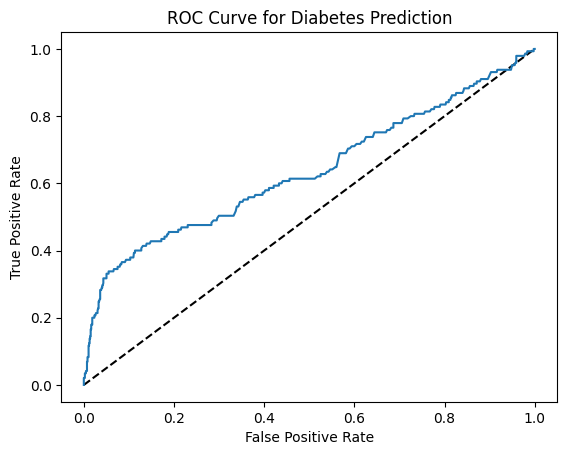

In [26]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [27]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test,y_pred))

# Calculate the classification report
print(classification_report(y_test,y_pred))

0.6356684815486993
[[848   7]
 [141   4]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       855
           1       0.36      0.03      0.05       145

    accuracy                           0.85      1000
   macro avg       0.61      0.51      0.49      1000
weighted avg       0.79      0.85      0.79      1000




Got It!
1. Hyperparameter tuning
Now that we know how to evaluate model performance, let's explore how to optimize our model.

2. Hyperparameter tuning
Recall that we had to choose a value for alpha in ridge and lasso regression before fitting it. Likewise, before fitting and predicting KNN, we choose n_neighbors. Parameters that we specify before fitting a model, like alpha and n_neighbors, are called hyperparameters. So, a fundamental step for building a successful model:

3. Choosing the correct hyperparameters
is choosing the correct hyperparameters. We can try lots of different values, fit all of them separately, see how well they perform, and choose the best values! This is called hyperparameter tuning. When fitting different hyperparameter values, we use cross-validation to avoid overfitting the hyperparameters to the test set. We can still split the data, but perform cross-validation on the training set. We withhold the test set and use it for evaluating the tuned model.

4. Grid search cross-validation
One approach for hyperparameter tuning is called grid search, where we choose a grid of possible hyperparameter values to try. For example, we can search across two hyperparameters for a KNN model - the type of metric and a different number of neighbors. Here we have n neighbors between two and eleven in increments of three, and two metrics: euclidean and manhattan. Therefore, we can create a grid of values like this.

5. Grid search cross-validation
We perform k-fold cross-validation for each combination of hyperparameters. The mean scores for each combination are shown here.

6. Grid search cross-validation
We then choose hyperparameters that performed best, as shown here.

7. GridSearchCV in scikit-learn
Let's perform a grid search on a regression model using our sales dataset. We import GridSearchCV from sklearn-dot-model_selection. We instantiate KFold. We then specify the names and values of the hyperparameters we wish to tune as the keys and values of a dictionary, param_grid. As always, we instantiate our model. We then call GridSearchCV and pass it our model, the grid we wish to tune over and set cv equal to kf. This returns a GridSearch object that we can then fit to the training data, and this fit performs the actual cross-validated grid search. We can then print the model's attributes best-params-underscore and best-score-underscore, respectively, to retrieve the hyperparameters that perform the best along with the mean cross-validation score over that fold.

8. Limitations and an alternative approach
Grid search is great. However, the number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds. Therefore, it doesn't scale well! So, performing 3-fold cross-validation for one hyperparameter with 10 values each means 30 fits, while 10-fold cross-validation on 3 hyperparameters with 10 values each equals 900 fits! However, there is another way.

9. RandomizedSearchCV
We can perform a random search, which picks random hyperparameter values rather than exhaustively searching through all options. Let's demonstrate this approach. We import RandomizedSearchCV from sklearn-dot-model_selection. We set up KFold and param_grid, and instantiate the model as before. We call RandomizedSearchCV using the same arguments and variables as GridSearchCV. We can optionally set the n_iter argument, which determines the number of hyperparameter values tested. So five-fold cross-validation with n_iter set to two performs 10 fits. Again we can access the best hyperparameters and their score. In this case it is able to find the best hyperparameters from our previous grid search!

10. Evaluating on the test set
We can evaluate model performance on the test set by passing it to a call of the random search object's dot-score method. It actually performs slightly better than the best score in our grid search!

11. Let's practice!
Now let's perform some hyperparameter tuning!

In [28]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.029478635146995318


In [32]:
# Create the parameter space
from sklearn.model_selection import RandomizedSearchCV
        
params = {"penalty": ["l2"],
         "tol": np.linspace(0.0001 , 1.0, 50),
         "C": np.linspace(0.1 ,1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.2245673469387755, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.3020408163265306}
Tuned Logistic Regression Best Accuracy Score: 0.8551356460746119


THIS IS THE END , CHAPTER FOUR WILL BE IN ANOTHER FILE, GOOD BYE..